Dataset https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data/data

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("used_device_data.csv")
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [154]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [155]:
df = df.dropna()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3253 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3253 non-null   object 
 1   os                     3253 non-null   object 
 2   screen_size            3253 non-null   float64
 3   4g                     3253 non-null   object 
 4   5g                     3253 non-null   object 
 5   rear_camera_mp         3253 non-null   float64
 6   front_camera_mp        3253 non-null   float64
 7   internal_memory        3253 non-null   float64
 8   ram                    3253 non-null   float64
 9   battery                3253 non-null   float64
 10  weight                 3253 non-null   float64
 11  release_year           3253 non-null   int64  
 12  days_used              3253 non-null   int64  
 13  normalized_used_price  3253 non-null   float64
 14  normalized_new_price   3253 non-null   float64
dtypes: float6

In [160]:
from collections import Counter
Counter(df["os"])

Counter({'Android': 3024, 'Others': 128, 'iOS': 36, 'Windows': 65})

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
        
df

C:\Users\niloy\AppData\Local\Temp\ipykernel_2404\3351412946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\niloy\AppData\Local\Temp\ipykernel_2404\3351412946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\niloy\AppData\Local\Temp\ipykernel_2404\3351412946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,2,3,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3450,3,0,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,1,0,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,1,0,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [169]:
# df[df["os"].isin((2,3))].to_csv("apple_windows.csv", index=False)

In [170]:
# df[df["os"].isin((0,1))].to_csv("androids.csv", index=False)

<Axes: >

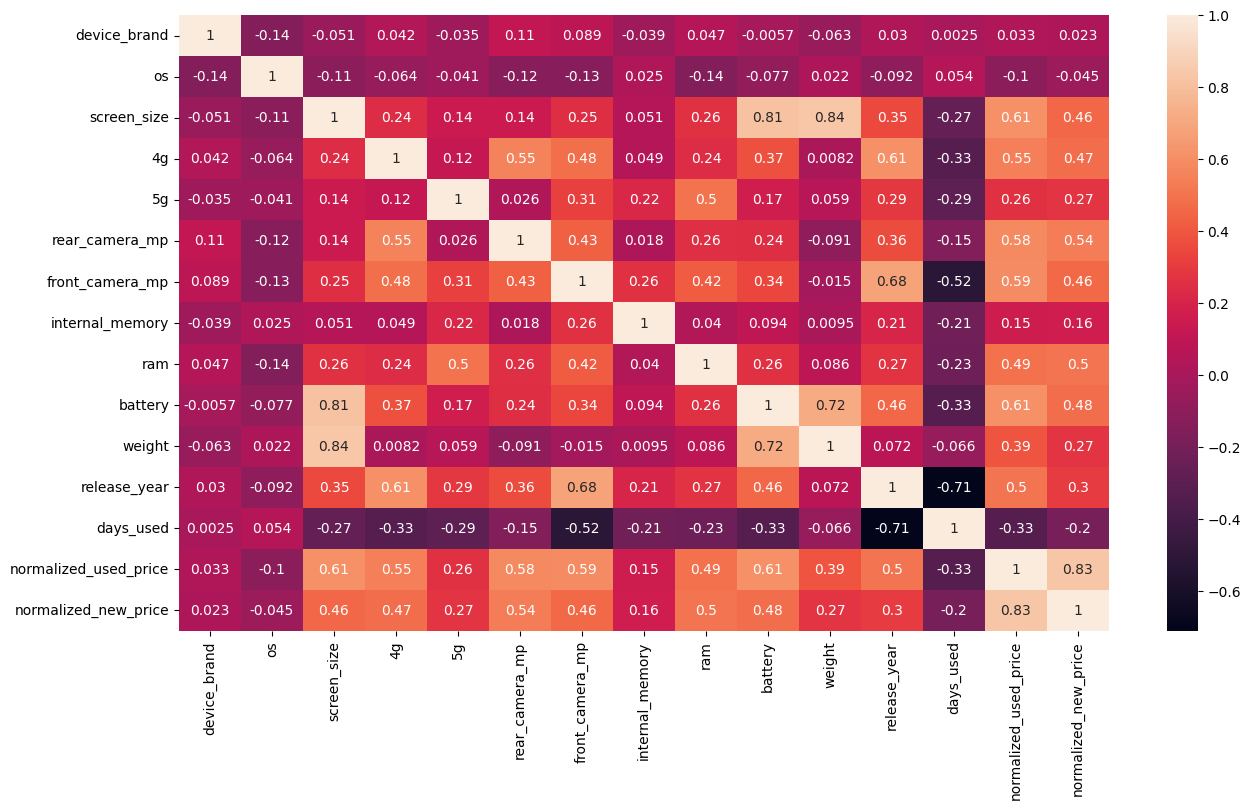

In [145]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

<Axes: >

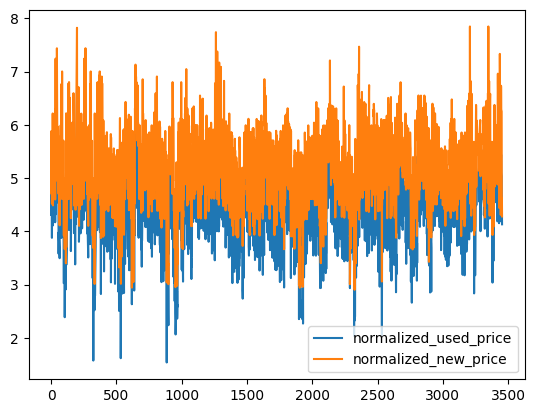

In [142]:
df[["normalized_used_price", "normalized_new_price"]].plot()

In [121]:
X = df.drop(columns=["normalized_used_price"])
y = df["normalized_used_price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [122]:
X_train.shape

(2602, 14)

In [123]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint


model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mape'])


checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_mape', 
                             mode='min', 
                             save_best_only=True, 
                             verbose=1)



# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint],
                    verbose=2)


Epoch 1/100

Epoch 1: val_mape improved from inf to 121.66441, saving model to best_model.h5
82/82 - 2s - loss: 17.0996 - mae: 4.0189 - mape: 93.2712 - val_loss: 28.7008 - val_mae: 5.2485 - val_mape: 121.6644 - 2s/epoch - 23ms/step
Epoch 2/100

Epoch 2: val_mape improved from 121.66441 to 58.89360, saving model to best_model.h5
82/82 - 1s - loss: 10.3435 - mae: 3.1091 - mape: 71.9523 - val_loss: 6.9930 - val_mae: 2.4986 - val_mape: 58.8936 - 754ms/epoch - 9ms/step
Epoch 3/100

Epoch 3: val_mape improved from 58.89360 to 22.99945, saving model to best_model.h5
82/82 - 1s - loss: 3.7808 - mae: 1.7762 - mape: 40.8381 - val_loss: 1.3013 - val_mae: 1.0009 - val_mape: 22.9995 - 706ms/epoch - 9ms/step
Epoch 4/100

Epoch 4: val_mape improved from 22.99945 to 10.11536, saving model to best_model.h5
82/82 - 1s - loss: 0.8671 - mae: 0.7570 - mape: 17.4093 - val_loss: 0.4575 - val_mae: 0.4093 - val_mape: 10.1154 - 720ms/epoch - 9ms/step
Epoch 5/100

Epoch 5: val_mape improved from 10.11536 to 8.50

In [124]:
model = tf.keras.models.load_model("best_model.h5")

In [135]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}, R2: {r2:.2f}, RMSE: {rmse:.2f}")

21/21 [==============================] - 0s 2ms/step
MAE: 0.21, MAPE: 0.05, R2: 0.39, RMSE: 0.49


In [138]:
# Example of using the model for a new input
new_input = X_test.iloc[56].values.reshape(1,-1)
prediction = model.predict(new_input)
prediction[0][0]*100

1/1 [==============================] - 0s 39ms/step


428.83386611938477

In [139]:
y_test.iloc[56]*100

453.9564429